# CAR PRICE PREDICTION WITH MACHINE LEARNING

### Import Libraries

In [91]:
# for data processing & data wrangling
import numpy as np
import pandas as pd
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# model selection libraries
from sklearn.model_selection import train_test_split
# for ML Model implementation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
# evaluation metric libraries
from sklearn import metrics

### Dataset

In [92]:
# Load
ds = pd.read_csv("car data.csv")
# First View
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [93]:
# Rows and Columns count
ds.shape

(301, 9)

#### Columns 

In [94]:
ds.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

#### Discription

In [95]:
ds.describe(include= 'all').round(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.00,301.00,301.00,301.00,301,301,301,301.00
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.63,4.66,7.63,36947.21,NaN,NaN,NaN,0.04
std,NaN,2.89,5.08,8.64,38886.88,NaN,NaN,NaN,0.25
min,NaN,2003.00,0.10,0.32,500.00,NaN,NaN,NaN,0.00
25%,NaN,2012.00,0.90,1.20,15000.00,NaN,NaN,NaN,0.00
50%,NaN,2014.00,3.60,6.40,32000.00,NaN,NaN,NaN,0.00
75%,NaN,2016.00,6.00,9.90,48767.00,NaN,NaN,NaN,0.00


#### Duplicate Values

In [96]:
dup = ds.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 2


#### Null Values

In [97]:
ds.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

### Data Pre-processing

#### Categorical Data

In [98]:
print(ds.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [99]:
print(ds.Selling_type.value_counts())

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64


In [100]:
print(ds.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


#### Categorical Encoding

In [101]:
ds.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
ds.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
ds.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [102]:
# View
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#### Data Scaling 

In [120]:
X = ds.drop(['Car_Name','Selling_Price'],axis=1)    # Data
print("X data:\n\n",X)
Y = ds['Selling_Price']    # Target
print("\nY data:\n\n",Y)

X data:

      Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2 

#### Data Splitting 

In [104]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2)
# Checking the train distribution of dependent variable
y_train.value_counts()

Selling_Price
0.45     8
0.60     8
5.25     6
1.05     5
4.50     5
        ..
8.40     1
20.75    1
6.95     1
0.10     1
3.49     1
Name: count, Length: 139, dtype: int64

### ML Model Implementation

##### Linear Regression

In [79]:
LinearRegression = LinearRegression()
LinearRegression.fit(x_train,y_train)
y_pred = LinearRegression.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print("R squared Error : ", r2)

R squared Error :  0.8464870294747049


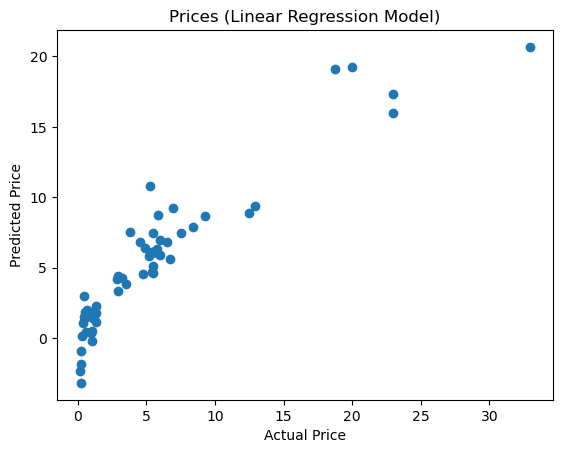

In [81]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prices (Linear Regression Model)")
plt.show()

##### Lasso Regression

In [116]:
lasso = Lasso()
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print("R squared Error : ", r2)

R squared Error :  0.8477524741691642


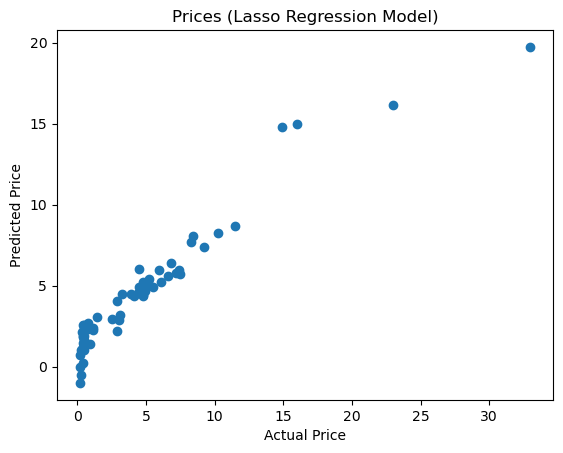

In [117]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prices (Lasso Regression Model)")
plt.show()

##### Random Forest

In [111]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print("R squared Error : ", r2)

R squared Error :  0.9281811209629522


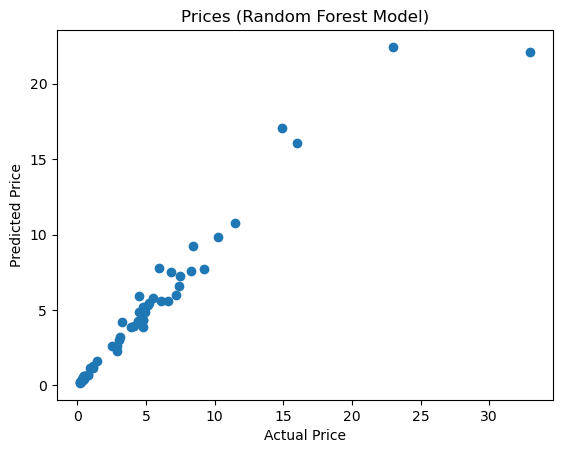

In [112]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prices (Random Forest Model)")
plt.show()

###### Random Forest Model is considered as the best Model